In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)


In [46]:
file_path = "Subsidies-2010-2023-_1_.csv"

# Load using header row 3 (because first 3 rows are garbage text)
df = pd.read_csv(file_path, header=3)

df.head()


,Unit: Real 2023 million USD,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,NaN,NaN,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
1,Total,All Products,"465,740","537,934","596,315","547,396","489,554","375,513","328,234","367,101","512,471","423,146","262,677","588,486","1,177,926","616,392"
2,Oil,Oil,"194,660","268,885","308,707","289,480","252,979","152,320","114,437","158,788","210,327","192,244","124,476","190,185","345,767","234,795"
3,Electricity,Electricity,"154,571","157,714","155,555","139,178","132,318","130,947","153,678","140,956","182,641","155,034","77,350","221,183","446,149","216,977"
4,Gas,Natural Gas,"113,330","108,192","128,287","116,644","102,867","90,930","58,103","64,680","116,536","73,368","58,642","172,693","376,559","162,516"


In [47]:
#================================================Clean the Data and Fix Column Names=====================================


In [48]:
# Make a clean copy
df_clean = df.copy()

# Rename the first column to "Product"
df_clean.rename(columns={df_clean.columns[0]: "Product"}, inplace=True)

# Remove empty "Unnamed" columns
df_clean = df_clean.dropna(axis=1, how="all")

df_clean.head()


,Product,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,NaN,NaN,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
1,Total,All Products,"465,740","537,934","596,315","547,396","489,554","375,513","328,234","367,101","512,471","423,146","262,677","588,486","1,177,926","616,392"
2,Oil,Oil,"194,660","268,885","308,707","289,480","252,979","152,320","114,437","158,788","210,327","192,244","124,476","190,185","345,767","234,795"
3,Electricity,Electricity,"154,571","157,714","155,555","139,178","132,318","130,947","153,678","140,956","182,641","155,034","77,350","221,183","446,149","216,977"
4,Gas,Natural Gas,"113,330","108,192","128,287","116,644","102,867","90,930","58,103","64,680","116,536","73,368","58,642","172,693","376,559","162,516"


In [50]:
# Convert all year columns to numeric values
for col in df_clean.columns:
    if col.isdigit():  # year columns
        df_clean[col] = pd.to_numeric(
            df_clean[col].astype(str).str.replace(",", ""),
            errors='coerce'
        )

df_clean.head()


,Product,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,NaN,NaN,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
1,Total,All Products,"465,740","537,934","596,315","547,396","489,554","375,513","328,234","367,101","512,471","423,146","262,677","588,486","1,177,926","616,392"
2,Oil,Oil,"194,660","268,885","308,707","289,480","252,979","152,320","114,437","158,788","210,327","192,244","124,476","190,185","345,767","234,795"
3,Electricity,Electricity,"154,571","157,714","155,555","139,178","132,318","130,947","153,678","140,956","182,641","155,034","77,350","221,183","446,149","216,977"
4,Gas,Natural Gas,"113,330","108,192","128,287","116,644","102,867","90,930","58,103","64,680","116,536","73,368","58,642","172,693","376,559","162,516"


In [51]:
#Basic Data Overview.........
#Shape of the data
#Column names
#Missing values
#Product categories


In [52]:
print("Shape of the dataset:")
print(df_clean.shape)

print("\nColumn names:")
print(df_clean.columns.tolist())

print("\nMissing values per column:")
print(df_clean.isnull().sum())

print("\nProducts available in dataset:")
print(df_clean["Product"].unique())


Shape of the dataset:
(351, 16)

Column names:
['Product', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15']

Missing values per column:
Product        105
Unnamed: 1     105
Unnamed: 2     104
Unnamed: 3     104
Unnamed: 4     104
Unnamed: 5     104
Unnamed: 6     104
Unnamed: 7     104
Unnamed: 8     104
Unnamed: 9     104
Unnamed: 10    104
Unnamed: 11    104
Unnamed: 12    104
Unnamed: 13    104
Unnamed: 14    104
Unnamed: 15    104
dtype: int64

Products available in dataset:
[nan 'Total' 'Oil' 'Electricity' 'Gas' 'Coal' 'Country' 'Algeria' 'Angola'
 'Argentina' 'Azerbaijan' 'Bahrain' 'Bangladesh' 'Bolivia' 'Brunei'
 'China' 'Colombia' 'Ecuador' 'Egypt' 'ElSalvador' 'Gabon' 'Ghana' 'India'
 'Indonesia' 'Iraq' 'Iran' 'Kazakhstan' 'Kuwait' 'Libya' 'Malaysia'
 'Mexico' 'Nigeria' 'Oman' 'Pakistan' 'Qatar' 'Russia' 'SaudiA

In [53]:
#Plot Total Subsidy Trend (2010–2023)

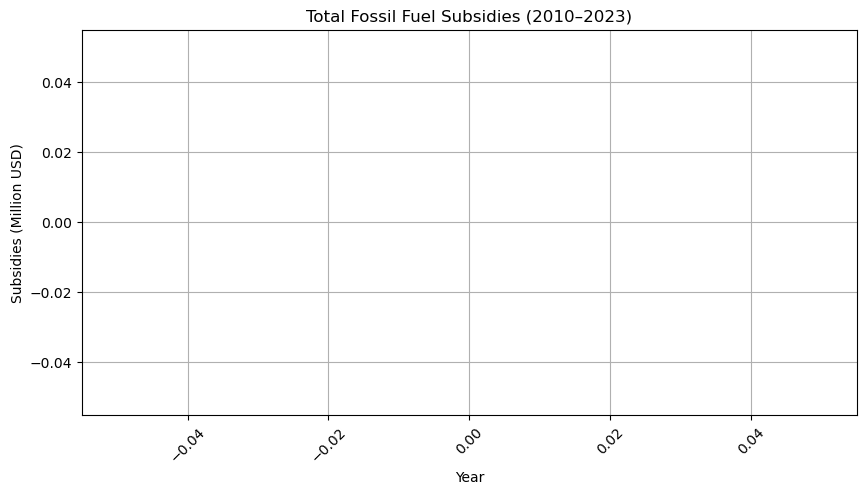

In [54]:
# Filter the row where Product == "Total"
total_row = df_clean[df_clean["Product"] == "Total"]

# Select only year columns
year_columns = [col for col in df_clean.columns if col.isdigit()]

# Extract values
years = year_columns
values = total_row[year_columns].values.flatten()

# Plot
plt.figure(figsize=(10, 5))
plt.plot(years, values, marker='o')

plt.title("Total Fossil Fuel Subsidies (2010–2023)")
plt.xlabel("Year")
plt.ylabel("Subsidies (Million USD)")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


In [55]:
#Compare Oil vs Electricity vs Gas (Multi-Line Plot)

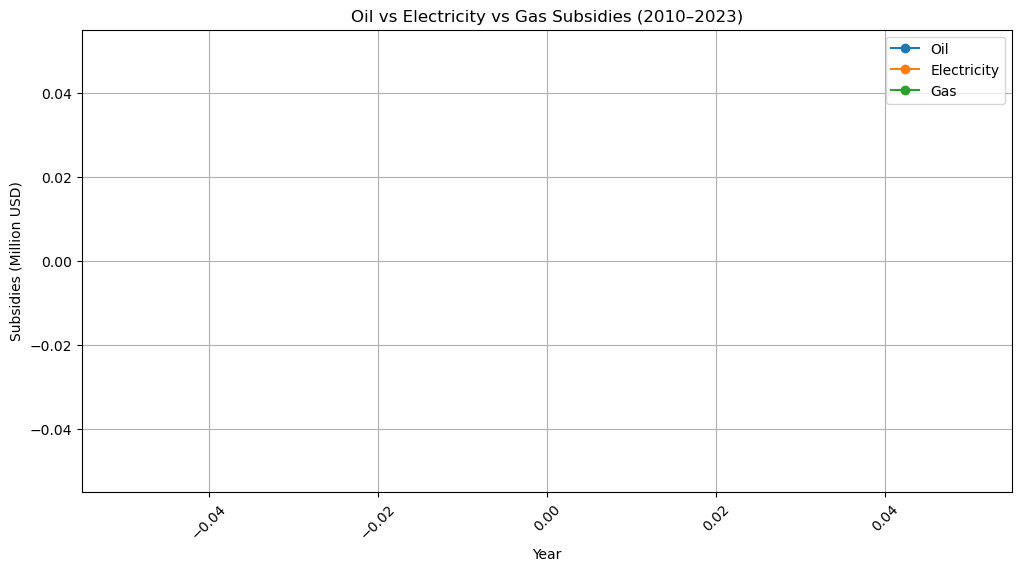

In [56]:
# Identify year columns
year_columns = [col for col in df_clean.columns if col.isdigit()]

# Filter rows for Oil, Electricity, Gas
oil_row = df_clean[df_clean["Product"] == "Oil"]
electricity_row = df_clean[df_clean["Product"] == "Electricity"]
gas_row = df_clean[df_clean["Product"] == "Gas"]

plt.figure(figsize=(12, 6))

# Plot Oil
plt.plot(year_columns, oil_row[year_columns].values.flatten(), marker='o', label="Oil")

# Plot Electricity
plt.plot(year_columns, electricity_row[year_columns].values.flatten(), marker='o', label="Electricity")

# Plot Gas
plt.plot(year_columns, gas_row[year_columns].values.flatten(), marker='o', label="Gas")

plt.title("Oil vs Electricity vs Gas Subsidies (2010–2023)")
plt.xlabel("Year")
plt.ylabel("Subsidies (Million USD)")
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [57]:
# Bar Chart: Subsidy Composition in a Single Year (Example: 2023)

In [62]:
print(df_clean.columns.tolist())


['Product', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15']


In [63]:
import pandas as pd

file_path = "Subsidies-2010-2023-_1_.csv"

raw = pd.read_csv(file_path, header=None)  # load without header
raw.head(20)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,IEA fossil fuel subsidies database,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,© 2024 IEA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Unit: Real 2023 million USD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
5,Total,All Products,"465,740","537,934","596,315","547,396","489,554","375,513","328,234","367,101","512,471","423,146","262,677","588,486","1,177,926","616,392"
6,Oil,Oil,"194,660","268,885","308,707","289,480","252,979","152,320","114,437","158,788","210,327","192,244","124,476","190,185","345,767","234,795"
7,Electricity,Electricity,"154,571","157,714","155,555","139,178","132,318","130,947","153,678","140,956","182,641","155,034","77,350","221,183","446,149","216,977"
8,Gas,Natural Gas,"113,330","108,192","128,287","116,644","102,867","90,930","58,103","64,680","116,536","73,368","58,642","172,693","376,559","162,516"
9,Coal,Coal,"3,179","4,280","3,766","2,095","1,389","1,316","2,017","2,677","2,967","2,501","2,210","4,424","9,451","2,103"


In [64]:
import pandas as pd

file_path = "Subsidies-2010-2023-_1_.csv"

# Load using header row 4 (0-indexed)
df = pd.read_csv(file_path, header=4)

# Keep only rows 5–9 (Total, Oil, Electricity, Natural Gas, Coal)
df = df.iloc[1:6]

df.head()


,Unnamed: 0,Unnamed: 1,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
1,Oil,Oil,"194,660","268,885","308,707","289,480","252,979","152,320","114,437","158,788","210,327","192,244","124,476","190,185","345,767","234,795"
2,Electricity,Electricity,"154,571","157,714","155,555","139,178","132,318","130,947","153,678","140,956","182,641","155,034","77,350","221,183","446,149","216,977"
3,Gas,Natural Gas,"113,330","108,192","128,287","116,644","102,867","90,930","58,103","64,680","116,536","73,368","58,642","172,693","376,559","162,516"
4,Coal,Coal,"3,179","4,280","3,766","2,095","1,389","1,316","2,017","2,677","2,967","2,501","2,210","4,424","9,451","2,103"
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
df.rename(columns={df.columns[0]: "Product"}, inplace=True)

# Convert year columns to numeric
for col in df.columns:
    if str(col).isdigit():
        df[col] = pd.to_numeric(df[col].astype(str).str.replace(",", ""), errors='coerce')

df.head()


,Product,Unnamed: 1,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
1,Oil,Oil,194660.0,268885.0,308707.0,289480.0,252979.0,152320.0,114437.0,158788.0,210327.0,192244.0,124476.0,190185.0,345767.0,234795.0
2,Electricity,Electricity,154571.0,157714.0,155555.0,139178.0,132318.0,130947.0,153678.0,140956.0,182641.0,155034.0,77350.0,221183.0,446149.0,216977.0
3,Gas,Natural Gas,113330.0,108192.0,128287.0,116644.0,102867.0,90930.0,58103.0,64680.0,116536.0,73368.0,58642.0,172693.0,376559.0,162516.0
4,Coal,Coal,3179.0,4280.0,3766.0,2095.0,1389.0,1316.0,2017.0,2677.0,2967.0,2501.0,2210.0,4424.0,9451.0,2103.0
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
#TOTAL SUBSIDY TREND (2010–2023)

In [72]:
print(df["Product"])
print(df["Product"].unique())




0            Oil
1    Electricity
2            Gas
3           Coal
4            NaN
Name: Product, dtype: object
['Oil' 'Electricity' 'Gas' 'Coal' nan]


In [73]:
df.iloc[0]


Product            Oil
Unnamed: 1         Oil
2010          194660.0
2011          268885.0
2012          308707.0
2013          289480.0
2014          252979.0
2015          152320.0
2016          114437.0
2017          158788.0
2018          210327.0
2019          192244.0
2020          124476.0
2021          190185.0
2022          345767.0
2023          234795.0
Name: 0, dtype: object

In [74]:
df.iloc[1]
df.iloc[2]
df.iloc[3]
df.iloc[4]


Product       NaN
Unnamed: 1    NaN
2010          NaN
2011          NaN
2012          NaN
2013          NaN
2014          NaN
2015          NaN
2016          NaN
2017          NaN
2018          NaN
2019          NaN
2020          NaN
2021          NaN
2022          NaN
2023          NaN
Name: 4, dtype: object

In [75]:
import pandas as pd

file_path = "Subsidies-2010-2023-_1_.csv"

# Load using row 4 as header
df = pd.read_csv(file_path, header=4)

# KEEP ROWS 1 TO 5 (BOTH INCLUDED)
df = df.iloc[1:6].reset_index(drop=True)

# Rename first column to Product
df.rename(columns={df.columns[0]: "Product"}, inplace=True)

# Convert year columns to numeric
for col in df.columns:
    if str(col).isdigit():
        df[col] = pd.to_numeric(df[col].astype(str).str.replace(",", ""), errors='coerce')

df



,Product,Unnamed: 1,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Oil,Oil,194660.0,268885.0,308707.0,289480.0,252979.0,152320.0,114437.0,158788.0,210327.0,192244.0,124476.0,190185.0,345767.0,234795.0
1,Electricity,Electricity,154571.0,157714.0,155555.0,139178.0,132318.0,130947.0,153678.0,140956.0,182641.0,155034.0,77350.0,221183.0,446149.0,216977.0
2,Gas,Natural Gas,113330.0,108192.0,128287.0,116644.0,102867.0,90930.0,58103.0,64680.0,116536.0,73368.0,58642.0,172693.0,376559.0,162516.0
3,Coal,Coal,3179.0,4280.0,3766.0,2095.0,1389.0,1316.0,2017.0,2677.0,2967.0,2501.0,2210.0,4424.0,9451.0,2103.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
#Compare Oil vs Electricity vs Gas vs Coal (Multi-Line Chart)

In [80]:
df.apply(lambda row: row.count(), axis=1)


0    16
1    16
2    16
3    16
4     0
dtype: int64

In [81]:
df

,Product,Unnamed: 1,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Oil,Oil,194660.0,268885.0,308707.0,289480.0,252979.0,152320.0,114437.0,158788.0,210327.0,192244.0,124476.0,190185.0,345767.0,234795.0
1,Electricity,Electricity,154571.0,157714.0,155555.0,139178.0,132318.0,130947.0,153678.0,140956.0,182641.0,155034.0,77350.0,221183.0,446149.0,216977.0
2,Gas,Natural Gas,113330.0,108192.0,128287.0,116644.0,102867.0,90930.0,58103.0,64680.0,116536.0,73368.0,58642.0,172693.0,376559.0,162516.0
3,Coal,Coal,3179.0,4280.0,3766.0,2095.0,1389.0,1316.0,2017.0,2677.0,2967.0,2501.0,2210.0,4424.0,9451.0,2103.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
# Keep only rows with valid product names
df = df.dropna(subset=["Product"]).reset_index(drop=True)

df


,Product,Unnamed: 1,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Oil,Oil,194660.0,268885.0,308707.0,289480.0,252979.0,152320.0,114437.0,158788.0,210327.0,192244.0,124476.0,190185.0,345767.0,234795.0
1,Electricity,Electricity,154571.0,157714.0,155555.0,139178.0,132318.0,130947.0,153678.0,140956.0,182641.0,155034.0,77350.0,221183.0,446149.0,216977.0
2,Gas,Natural Gas,113330.0,108192.0,128287.0,116644.0,102867.0,90930.0,58103.0,64680.0,116536.0,73368.0,58642.0,172693.0,376559.0,162516.0
3,Coal,Coal,3179.0,4280.0,3766.0,2095.0,1389.0,1316.0,2017.0,2677.0,2967.0,2501.0,2210.0,4424.0,9451.0,2103.0


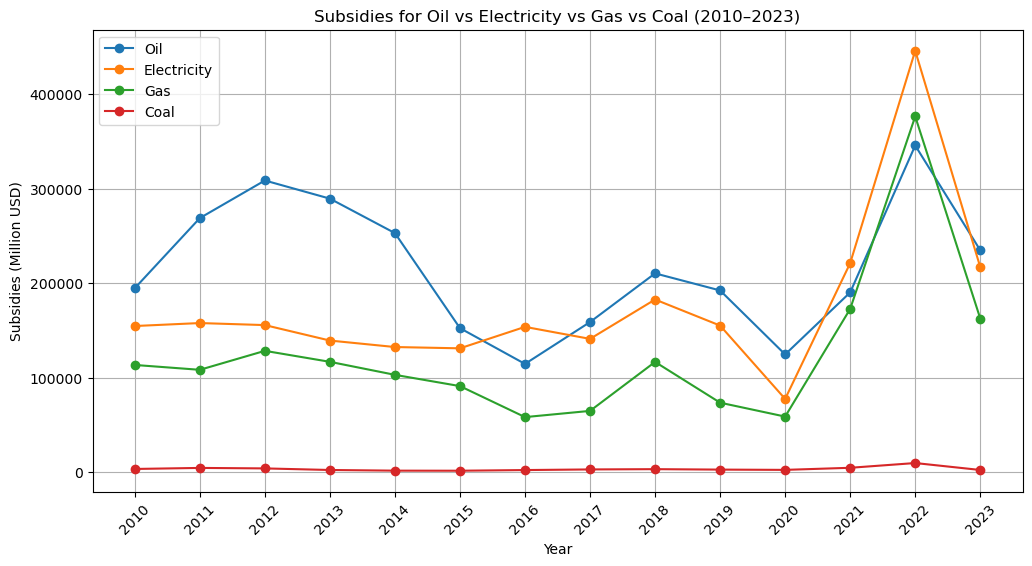

In [84]:
import matplotlib.pyplot as plt

# Identify year columns
year_columns = [col for col in df.columns if str(col).isdigit()]

plt.figure(figsize=(12, 6))

for i, row in df.iterrows():
    product = row["Product"]
    values = row[year_columns].values.flatten()
    plt.plot(year_columns, values, marker='o', label=product)

plt.title("Subsidies for Oil vs Electricity vs Gas vs Coal (2010–2023)")
plt.xlabel("Year")
plt.ylabel("Subsidies (Million USD)")
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [ ]:
#Bar Chart for Any Single Year (Subsidy Composition)

In [85]:
# Choose the year you want (MUST be an integer)
year = 2023   # you can change: 2010, 2015, 2018, 2021, etc.

# Identify year columns
year_columns = [col for col in df.columns if str(col).isdigit()]

# Check if year is valid
if year not in df.columns:
    print(f"Year {year} not found. Available years:", year_columns)
else:
    # Extract product names
    products = df["Product"]

    # Extract values for the selected year
    values = df[year].values

    # Plot bar chart
    plt.figure(figsize=(8,5))
    plt.bar(products, values)

    plt.title(f"Subsidy Composition for {year}")
    plt.xlabel("Product Category")
    plt.ylabel("Subsidies (Million USD)")
    plt.grid(axis='y')
    plt.show()


Year 2023 not found. Available years: ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']


In [86]:
#Total Subsidy (Oil + Electricity + Gas + Coal) per Year

2010     465740.0
2011     539071.0
2012     596315.0
2013     547397.0
2014     489553.0
2015     375513.0
2016     328235.0
2017     367101.0
2018     512471.0
2019     423147.0
2020     262678.0
2021     588485.0
2022    1177926.0
2023     616391.0
dtype: float64


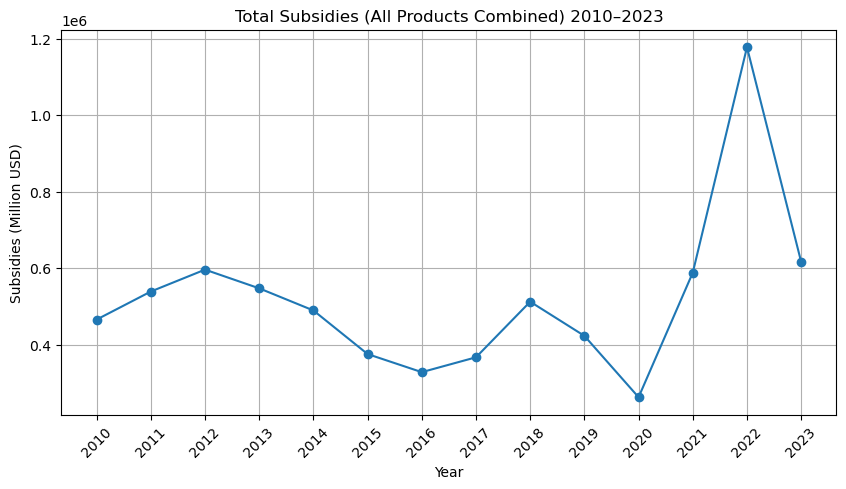

In [87]:
# Identify year columns
year_columns = [col for col in df.columns if str(col).isdigit()]

# Compute total subsidy for each year (sum across all products)
total_by_year = df[year_columns].sum(axis=0)

# Display results
print(total_by_year)

# Plot the total trend
plt.figure(figsize=(10,5))
plt.plot(year_columns, total_by_year.values, marker='o')

plt.title("Total Subsidies (All Products Combined) 2010–2023")
plt.xlabel("Year")
plt.ylabel("Subsidies (Million USD)")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


In [88]:
#Year-over-Year Growth (Percentage Change)

Year-over-Year % Change:
2010           NaN
2011     15.745051
2012     10.619009
2013     -8.203382
2014    -10.567102
2015    -23.294720
2016    -12.590243
2017     11.840907
2018     39.599456
2019    -17.430059
2020    -37.922755
2021    124.032846
2022    100.162451
2023    -47.671501
dtype: float64


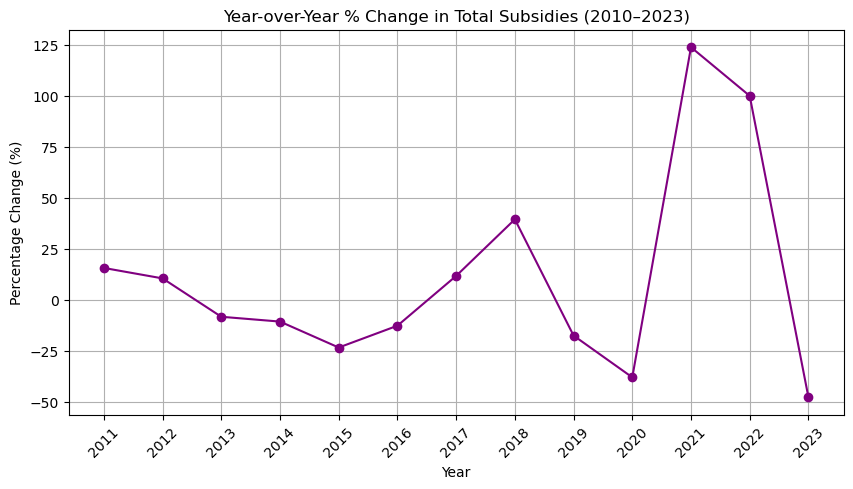

In [89]:
# Identify year columns
year_columns = [col for col in df.columns if str(col).isdigit()]

# Compute total subsidy per year
total_by_year = df[year_columns].sum(axis=0)

# Calculate year-over-year % change
yoy_change = total_by_year.pct_change() * 100

# Display the YoY percentage change
print("Year-over-Year % Change:")
print(yoy_change)

# Plot YoY change
plt.figure(figsize=(10,5))
plt.plot(year_columns, yoy_change.values, marker='o', color='purple')

plt.title("Year-over-Year % Change in Total Subsidies (2010–2023)")
plt.xlabel("Year")
plt.ylabel("Percentage Change (%)")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


In [90]:
#Heatmap: Product vs Year

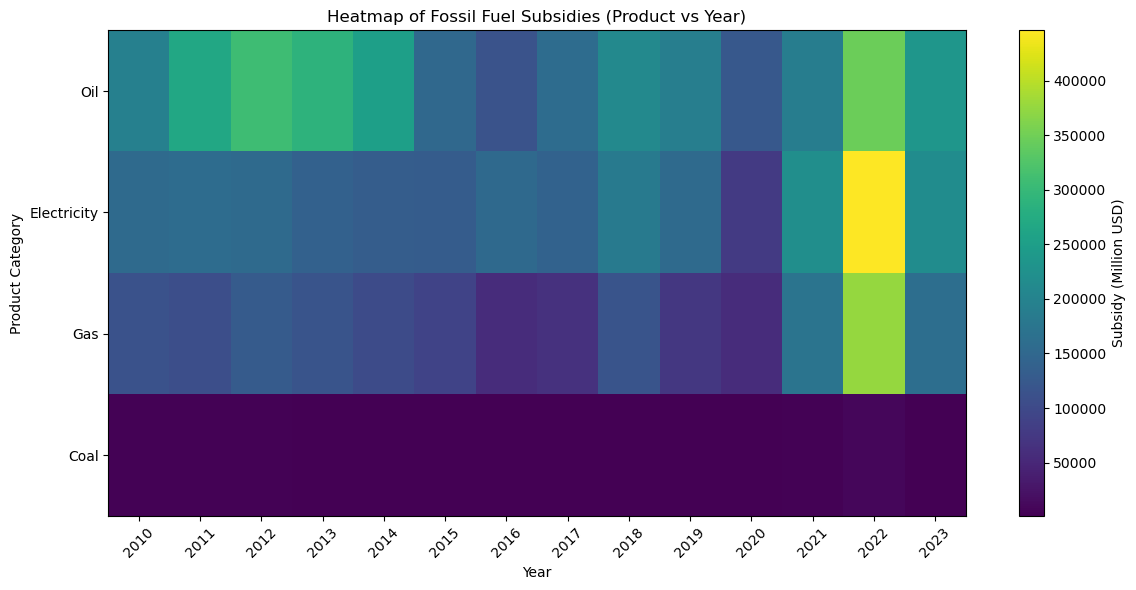

In [91]:
import numpy as np
import matplotlib.pyplot as plt

# Identify year columns
year_columns = [col for col in df.columns if str(col).isdigit()]

# Matrix of values (rows = products, columns = years)
matrix = df[year_columns].values

# Create figure
plt.figure(figsize=(12, 6))

plt.imshow(matrix, aspect='auto')

plt.colorbar(label="Subsidy (Million USD)")

# Set ticks & labels
plt.xticks(ticks=np.arange(len(year_columns)), labels=year_columns, rotation=45)
plt.yticks(ticks=np.arange(len(df)), labels=df["Product"])

plt.title("Heatmap of Fossil Fuel Subsidies (Product vs Year)")
plt.xlabel("Year")
plt.ylabel("Product Category")

plt.tight_layout()
plt.show()


In [92]:
#Export Cleaned Product-Level Data to CSV

In [93]:
# Save cleaned dataset
df.to_csv("cleaned_product_level_subsidies.csv", index=False)

print("File saved as cleaned_product_level_subsidies.csv")


File saved as cleaned_product_level_subsidies.csv


In [94]:
#COUNTRY-LEVEL ANALYSIS
#Load Country-Level Section

In [95]:
raw = pd.read_csv("Subsidies-2010-2023-_1_.csv", header=None)

raw.head(30)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,IEA fossil fuel subsidies database,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,© 2024 IEA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Unit: Real 2023 million USD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
5,Total,All Products,"465,740","537,934","596,315","547,396","489,554","375,513","328,234","367,101","512,471","423,146","262,677","588,486","1,177,926","616,392"
6,Oil,Oil,"194,660","268,885","308,707","289,480","252,979","152,320","114,437","158,788","210,327","192,244","124,476","190,185","345,767","234,795"
7,Electricity,Electricity,"154,571","157,714","155,555","139,178","132,318","130,947","153,678","140,956","182,641","155,034","77,350","221,183","446,149","216,977"
8,Gas,Natural Gas,"113,330","108,192","128,287","116,644","102,867","90,930","58,103","64,680","116,536","73,368","58,642","172,693","376,559","162,516"
9,Coal,Coal,"3,179","4,280","3,766","2,095","1,389","1,316","2,017","2,677","2,967","2,501","2,210","4,424","9,451","2,103"


In [97]:
# STEP: Load country-level table from the CSV
import pandas as pd
import numpy as np

file_path = "Subsidies-2010-2023-_1_.csv"   # your local file

# 1) Load using the country-table header row (row index 11)
country_df = pd.read_csv(file_path, header=11)

# 2) Drop columns that are fully empty
country_df = country_df.dropna(axis=1, how='all')

# 3) Show basic preview and columns
print("Shape:", country_df.shape)
print("Columns:", country_df.columns.tolist())
display(country_df.head(10))

# 4) Convert year columns to numeric (2010..2023)
for col in country_df.columns:
    if str(col).isdigit():
        country_df[col] = pd.to_numeric(country_df[col].astype(str).str.replace(",", ""), errors='coerce')

# 5) Normalize column names: common names are 'Country' and 'Product'
# If pandas read different names, try to rename using heuristics
cols = country_df.columns.tolist()
if cols[0].lower() not in ['country', 'country name', 'entity', 'location']:
    # attempt to rename first two columns to Country and Product
    try:
        country_df = country_df.rename(columns={cols[0]: 'Country', cols[1]: 'Product'})
    except Exception:
        pass

# 6) Drop rows without a Country name (these are empty rows)
if 'Country' in country_df.columns:
    country_df = country_df[~country_df['Country'].isna()].reset_index(drop=True)

print("\nAfter cleanup:")
print("Shape:", country_df.shape)
print("Columns:", country_df.columns.tolist())
display(country_df.head(10))

# 7) Quick checks: unique products and sample country
if 'Product' in country_df.columns:
    print("\nUnique Product types (sample):", country_df['Product'].unique()[:20])
if 'Country' in country_df.columns:
    print("Sample countries:", country_df['Country'].unique()[:10])


Shape: (343, 16)
Columns: ['Country', 'Product', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']


,Country,Product,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Algeria,Oil,"9,546.4","9,704.7","12,168.6","13,299.2","12,295.1","8,431.2","4,656.2","5,970.6","11,436.8","10,816.1","6,673.0","10,295.3","16,367.3","12,514.7"
1,Algeria,Electricity,"1,626.7","1,828.7","2,216.7","2,685.0","2,760.7","2,823.2","1,845.6","2,617.9","4,149.8","2,655.5","1,797.3","7,622.1","16,096.9","5,491.0"
2,Algeria,Gas,"2,622.6","3,155.5","3,635.4","3,364.7","2,815.4","2,582.0","1,648.9","2,220.0","4,442.9","2,393.1","1,418.5","9,406.5","24,471.7","8,590.2"
3,Algeria,Coal,-,-,-,-,-,-,-,-,-,-,-,-,-,-
4,Algeria,Total,"13,795.7","14,688.9","18,020.8","19,348.9","17,871.1","13,836.3","8,150.6","10,808.5","20,029.5","15,864.6","9,888.8","27,323.8","56,935.9","26,595.9"
5,Angola,Oil,852.6,869.2,966.8,"1,410.1","1,364.1",28.5,2.3,5.6,"1,318.5","1,211.4","1,414.9","2,987.9","2,775.8","3,563.8"
6,Angola,Electricity,227.0,276.2,373.1,428.9,223.6,142.3,495.5,193.5,524.1,377.5,930.7,"1,472.2","1,539.8","1,424.3"
7,Angola,Gas,-,-,-,-,-,-,-,-,-,-,-,-,-,-
8,Angola,Coal,-,-,-,-,-,-,-,-,-,-,-,-,-,-
9,Angola,Total,"1,079.6",9.0,"1,339.8","1,839.0","1,587.7",170.8,497.8,199.1,"1,842.6","1,588.9","2,345.6","4,460.1","4,315.6","4,988.1"



After cleanup:
Shape: (240, 16)
Columns: ['Country', 'Product', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']


,Country,Product,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Algeria,Oil,9546.4,9704.7,12168.6,13299.2,12295.1,8431.2,4656.2,5970.6,11436.8,10816.1,6673.0,10295.3,16367.3,12514.7
1,Algeria,Electricity,1626.7,1828.7,2216.7,2685.0,2760.7,2823.2,1845.6,2617.9,4149.8,2655.5,1797.3,7622.1,16096.9,5491.0
2,Algeria,Gas,2622.6,3155.5,3635.4,3364.7,2815.4,2582.0,1648.9,2220.0,4442.9,2393.1,1418.5,9406.5,24471.7,8590.2
3,Algeria,Coal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Algeria,Total,13795.7,14688.9,18020.8,19348.9,17871.1,13836.3,8150.6,10808.5,20029.5,15864.6,9888.8,27323.8,56935.9,26595.9
5,Angola,Oil,852.6,869.2,966.8,1410.1,1364.1,28.5,2.3,5.6,1318.5,1211.4,1414.9,2987.9,2775.8,3563.8
6,Angola,Electricity,227.0,276.2,373.1,428.9,223.6,142.3,495.5,193.5,524.1,377.5,930.7,1472.2,1539.8,1424.3
7,Angola,Gas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Angola,Coal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Angola,Total,1079.6,9.0,1339.8,1839.0,1587.7,170.8,497.8,199.1,1842.6,1588.9,2345.6,4460.1,4315.6,4988.1



Unique Product types (sample): ['Oil' 'Electricity' 'Gas' 'Coal' 'Total']
Sample countries: ['Algeria' 'Angola' 'Argentina' 'Azerbaijan' 'Bahrain' 'Bangladesh'
 'Bolivia' 'Brunei' 'China' 'Colombia']


In [98]:
#Total Subsidy by Country (2010–2023 Combined)

Top 10 Countries by Total Subsidy (2010–2023):
Country
Iran           2067536.8
Russia         1794557.7
SaudiArabia    1741092.2
China          1215686.5
India           931338.2
Indonesia       806462.2
Egypt           650432.1
Algeria         546319.0
UAE             442382.0
Mexico          394424.0
Name: Total_All_Years, dtype: float64


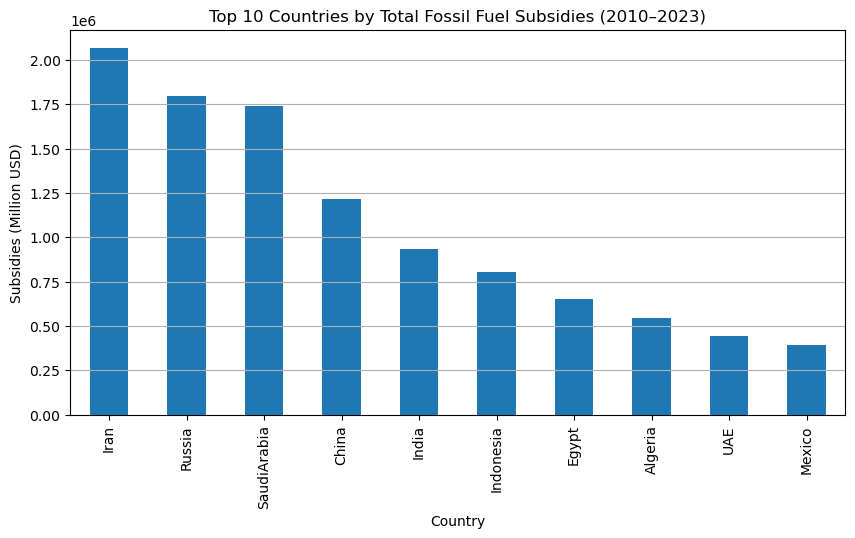

In [99]:
# 1. Identify year columns
year_cols = [col for col in country_df.columns if str(col).isdigit()]

# 2. Compute total subsidy for each row (all years combined)
country_df["Total_All_Years"] = country_df[year_cols].sum(axis=1)

# 3. Group by country and sum all products
total_by_country = country_df.groupby("Country")["Total_All_Years"].sum()

# 4. Sort and take top 10
top10_countries = total_by_country.sort_values(ascending=False).head(10)

# 5. Show results
print("Top 10 Countries by Total Subsidy (2010–2023):")
print(top10_countries)

# 6. Plot
plt.figure(figsize=(10,5))
top10_countries.plot(kind='bar')
plt.title("Top 10 Countries by Total Fossil Fuel Subsidies (2010–2023)")
plt.ylabel("Subsidies (Million USD)")
plt.grid(axis='y')
plt.show()


In [100]:
#Country Trend (Pick any country and plot its subsidies 2010–2023)

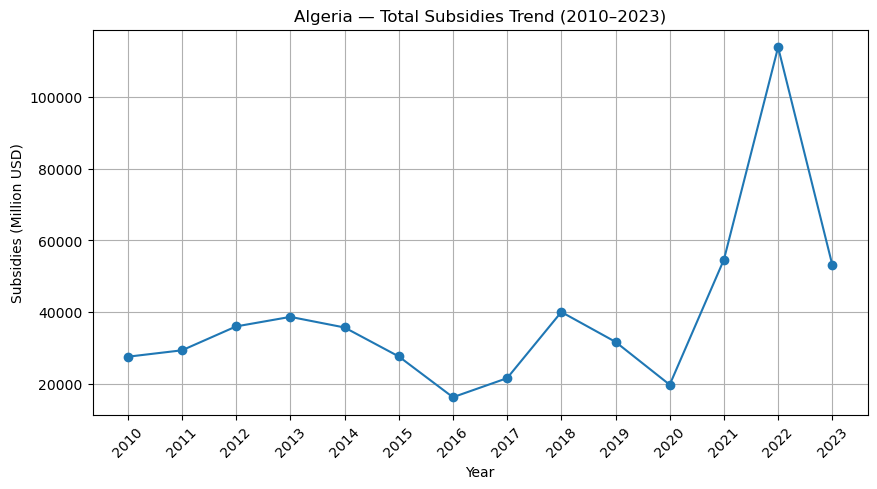

2010     27591.4
2011     29377.8
2012     36041.5
2013     38697.8
2014     35742.3
2015     27672.7
2016     16301.3
2017     21617.0
2018     40059.0
2019     31729.3
2020     19777.6
2021     54647.7
2022    113871.8
2023     53191.8
dtype: float64


In [101]:
# === Step 1: Choose a country ===
country_name = "Algeria"   # <-- you can change this to any country

# === Step 2: Identify year columns ===
year_cols = [col for col in country_df.columns if str(col).isdigit()]

# === Step 3: Filter rows for that country ===
country_data = country_df[country_df["Country"] == country_name]

# === Step 4: Sum all product subsidies for each year ===
country_trend = country_data[year_cols].sum(axis=0)

# === Step 5: Plot ===
plt.figure(figsize=(10,5))
plt.plot(year_cols, country_trend.values, marker='o')

plt.title(f"{country_name} — Total Subsidies Trend (2010–2023)")
plt.xlabel("Year")
plt.ylabel("Subsidies (Million USD)")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

print(country_trend)


In [102]:
#Compare Multiple Countries (Multi-Line Plot)

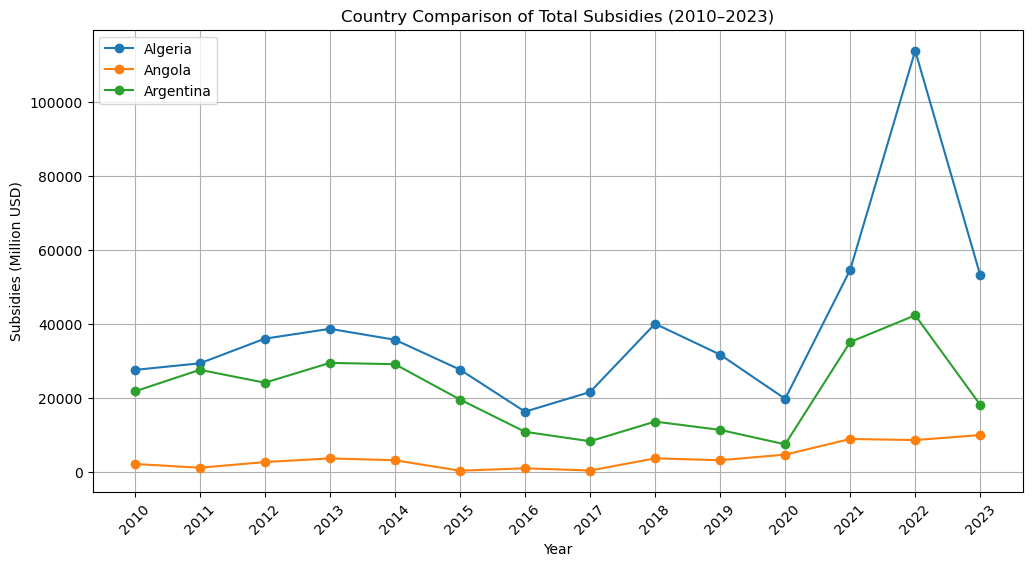

In [103]:
# ========== Step 1: Choose countries to compare ==========
countries_to_compare = ["Algeria", "Angola", "Argentina"]  
# 👆 You can add or replace names

# ========== Step 2: Identify year columns ==========
year_cols = [col for col in country_df.columns if str(col).isdigit()]

plt.figure(figsize=(12, 6))

for country in countries_to_compare:
    # Filter this country
    country_data = country_df[country_df["Country"] == country]
    
    # Sum across all products (Oil, Gas, Electricity, Coal, Total)
    country_trend = country_data[year_cols].sum(axis=0)
    
    # Plot
    plt.plot(year_cols, country_trend.values, marker='o', label=country)

plt.title("Country Comparison of Total Subsidies (2010–2023)")
plt.xlabel("Year")
plt.ylabel("Subsidies (Million USD)")
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [104]:
# Product-Wise Subsidies for One Country (Stacked Bar Chart)

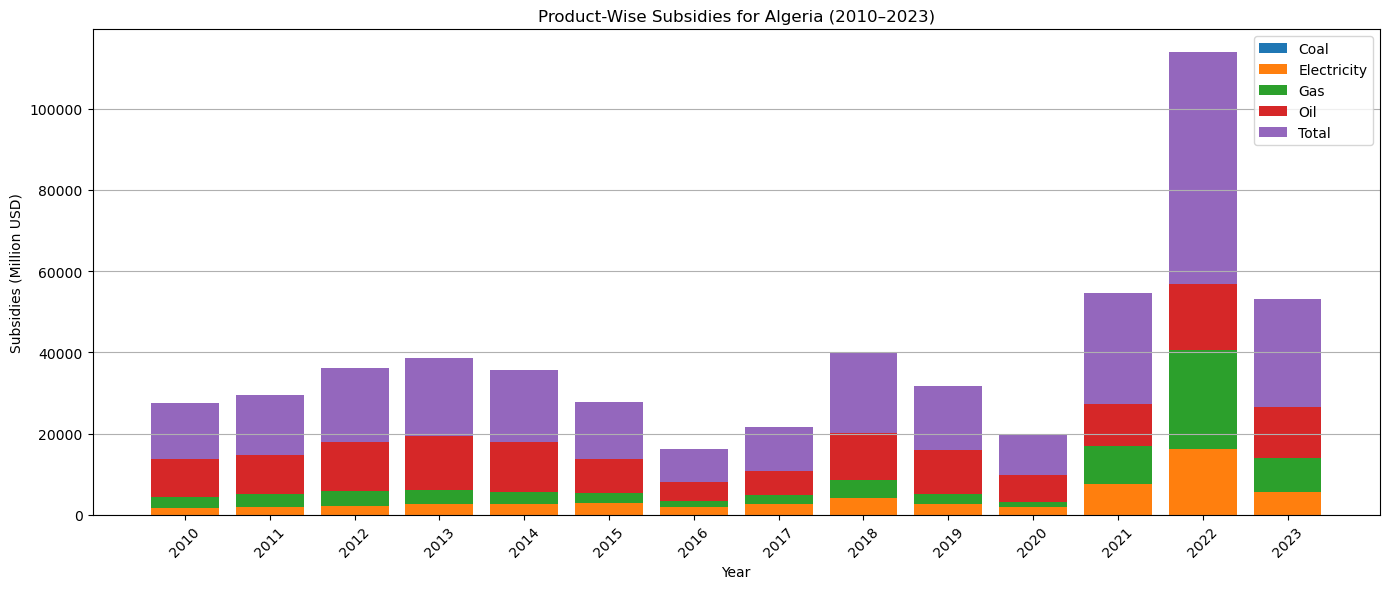

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Product,,,,,,,,,,,,,,
Coal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Electricity,1626.7,1828.7,2216.7,2685.0,2760.7,2823.2,1845.6,2617.9,4149.8,2655.5,1797.3,7622.1,16096.9,5491.0
Gas,2622.6,3155.5,3635.4,3364.7,2815.4,2582.0,1648.9,2220.0,4442.9,2393.1,1418.5,9406.5,24471.7,8590.2
Oil,9546.4,9704.7,12168.6,13299.2,12295.1,8431.2,4656.2,5970.6,11436.8,10816.1,6673.0,10295.3,16367.3,12514.7
Total,13795.7,14688.9,18020.8,19348.9,17871.1,13836.3,8150.6,10808.5,20029.5,15864.6,9888.8,27323.8,56935.9,26595.9


In [105]:
# ===== Step 1: Choose a country =====
country_name = "Algeria"   # <-- change to any country (Angola, Argentina, Azerbaijan, Bangladesh, etc.)

# ===== Step 2: Identify year columns =====
year_cols = [col for col in country_df.columns if str(col).isdigit()]

# ===== Step 3: Filter only rows for the chosen country =====
country_data = country_df[country_df["Country"] == country_name]

# ===== Step 4: Pivot the data to have Product vs Year =====
pivot_table = country_data.pivot_table(index="Product", values=year_cols, aggfunc="sum")

# Remove rows where product is NaN
pivot_table = pivot_table.dropna(axis=0, how='all')

# ===== Step 5: Plot as stacked bar chart =====
plt.figure(figsize=(14, 6))

bottom = np.zeros(len(year_cols))  # initialize bottom for stacking

for product in pivot_table.index:
    values = pivot_table.loc[product].values
    plt.bar(year_cols, values, bottom=bottom, label=product)
    bottom += values  # update bottom for next product

plt.title(f"Product-Wise Subsidies for {country_name} (2010–2023)")
plt.xlabel("Year")
plt.ylabel("Subsidies (Million USD)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

pivot_table


In [106]:
#Top Countries for Each Product (Oil, Gas, Electricity, Coal)


===== Top 5 Countries for Oil Subsidies (2010–2023) =====
Country
SaudiArabia    520153.2
Iran           409319.1
India          311822.2
Indonesia      295430.2
China          240022.7
Name: Total, dtype: float64


C:\Users\otawa\AppData\Local\Temp\ipykernel_25632\3453858942.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod_df["Total"] = prod_df[year_cols].sum(axis=1)


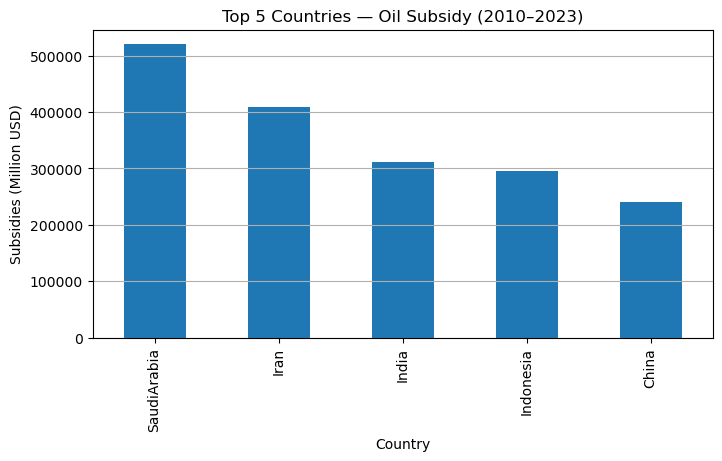


===== Top 5 Countries for Gas Subsidies (2010–2023) =====
Country
Russia         421855.1
Iran           334658.8
SaudiArabia    139609.0
UAE            132920.0
Uzbekistan      92824.3
Name: Total, dtype: float64


C:\Users\otawa\AppData\Local\Temp\ipykernel_25632\3453858942.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod_df["Total"] = prod_df[year_cols].sum(axis=1)


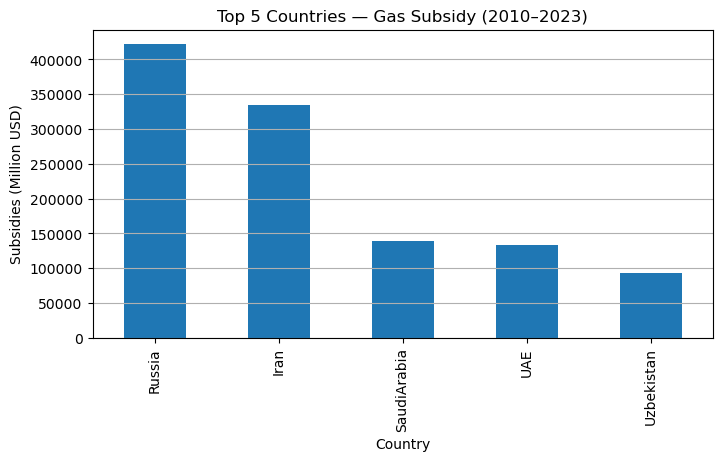


===== Top 5 Countries for Electricity Subsidies (2010–2023) =====
Country
Russia         380454.6
China          339987.9
Iran           289790.5
SaudiArabia    210783.8
India          130160.4
Name: Total, dtype: float64


C:\Users\otawa\AppData\Local\Temp\ipykernel_25632\3453858942.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod_df["Total"] = prod_df[year_cols].sum(axis=1)


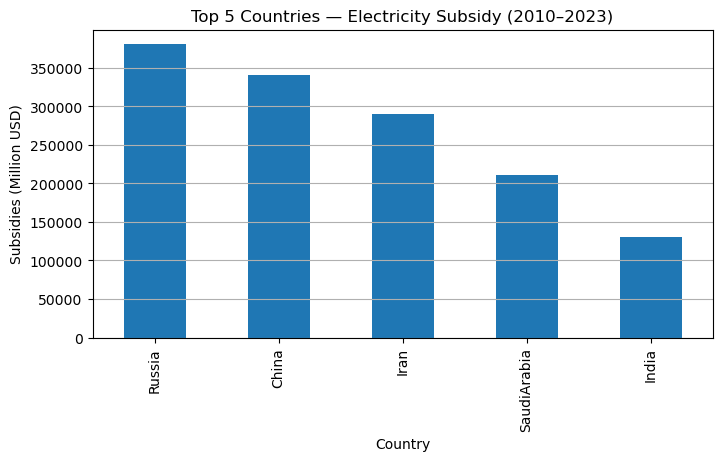


===== Top 5 Countries for Coal Subsidies (2010–2023) =====
Country
Kazakhstan    26834.4
Vietnam        6597.6
Thailand       4783.8
Russia         2821.4
Taipei         2218.7
Name: Total, dtype: float64


C:\Users\otawa\AppData\Local\Temp\ipykernel_25632\3453858942.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod_df["Total"] = prod_df[year_cols].sum(axis=1)


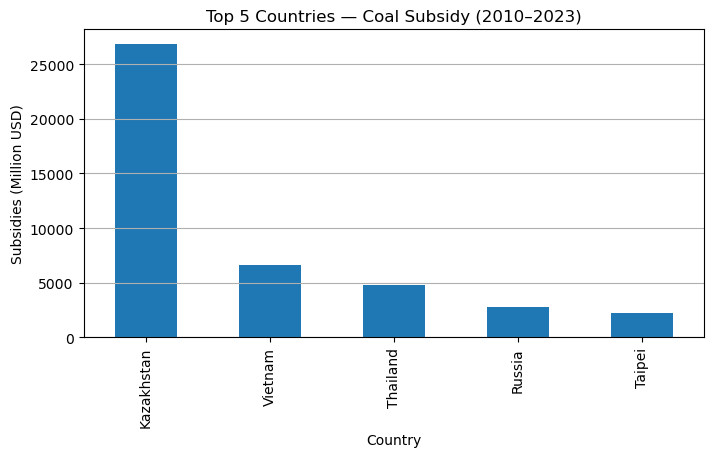

In [107]:
# Identify year columns
year_cols = [col for col in country_df.columns if str(col).isdigit()]

# List of products to analyze
products = ["Oil", "Gas", "Electricity", "Coal"]

# Loop through each product
for prod in products:
    print(f"\n===== Top 5 Countries for {prod} Subsidies (2010–2023) =====")
    
    # Select only rows matching the product
    prod_df = country_df[country_df["Product"] == prod]
    
    # Compute total subsidy (2010–2023)
    prod_df["Total"] = prod_df[year_cols].sum(axis=1)
    
    # Group by country
    top_countries = prod_df.groupby("Country")["Total"].sum().sort_values(ascending=False).head(5)
    
    print(top_countries)
    
    # Plot bar chart
    plt.figure(figsize=(8,4))
    top_countries.plot(kind='bar')
    plt.title(f"Top 5 Countries — {prod} Subsidy (2010–2023)")
    plt.ylabel("Subsidies (Million USD)")
    plt.grid(axis='y')
    plt.show()


In [108]:
#Global Product Trend (Stacked Area Chart)

                 2010      2011      2012      2013      2014      2015  \
Product                                                                   
Coal           3178.9    4280.5    3765.8    2095.0    1389.3    1315.9   
Electricity  154571.2  157714.0  155555.0  139177.8  132318.2  130946.8   
Gas          113329.5  108191.8  128286.9  116643.6  102867.6   90930.4   
Oil          194660.3  268885.0  308707.4  289479.5  252979.1  152320.1   

                 2016      2017      2018      2019      2020      2021  \
Product                                                                   
Coal           2016.7    2676.5    2966.6    2500.9    2210.5    4424.4   
Electricity  153677.6  140956.4  182640.7  155034.0   77349.5  221183.5   
Gas           58102.6   64679.8  116535.9   73367.6   58641.3  172692.8   
Oil          114437.2  158788.6  210327.1  192243.6  124475.6  190185.5   

                 2022      2023  
Product                          
Coal           9451.3    2103.

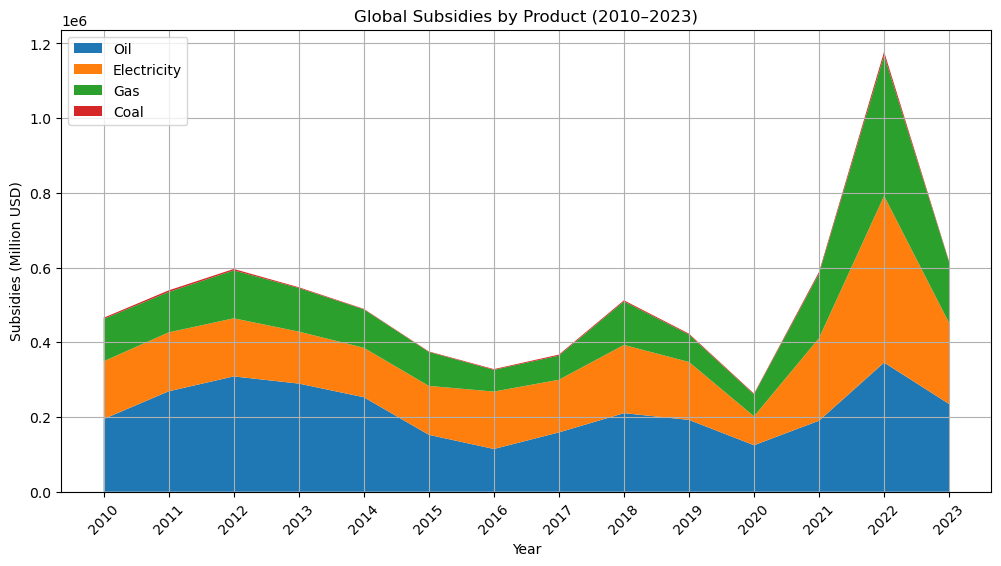

In [109]:
# Identify year columns
year_cols = [col for col in country_df.columns if str(col).isdigit()]

# Products to analyze
products = ["Oil", "Electricity", "Gas", "Coal"]

# Create a pivot table: products × years (sum across all countries)
global_product_trend = country_df[country_df["Product"].isin(products)].groupby("Product")[year_cols].sum()

# Display for reference
print(global_product_trend)

# Plot stacked area chart
plt.figure(figsize=(12, 6))

plt.stackplot(
    year_cols,
    [global_product_trend.loc[p].values for p in products],
    labels=products
)

plt.title("Global Subsidies by Product (2010–2023)")
plt.xlabel("Year")
plt.ylabel("Subsidies (Million USD)")
plt.legend(loc="upper left")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


In [110]:
#Correlation Between Products (Oil, Gas, Electricity, Coal)

Correlation Matrix:
Product          Coal  Electricity       Gas       Oil
Product                                               
Coal         1.000000     0.890743  0.886769  0.593225
Electricity  0.890743     1.000000  0.961329  0.575248
Gas          0.886769     0.961329  1.000000  0.687067
Oil          0.593225     0.575248  0.687067  1.000000


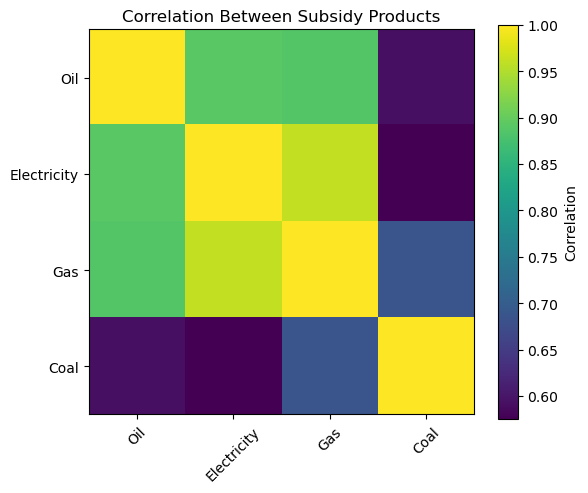

In [111]:
import numpy as np
import matplotlib.pyplot as plt

# Identify year columns
year_cols = [col for col in country_df.columns if str(col).isdigit()]

# Products to include
products = ["Oil", "Electricity", "Gas", "Coal"]

# Create a DataFrame of product totals by year
global_product_trend = country_df[country_df["Product"].isin(products)].groupby("Product")[year_cols].sum()

# Transpose so that Products become columns
corr_df = global_product_trend.T

# Calculate correlation matrix
corr_matrix = corr_df.corr()

print("Correlation Matrix:")
print(corr_matrix)

# Heatmap using matplotlib
plt.figure(figsize=(6, 5))
plt.imshow(corr_matrix, cmap="viridis")
plt.colorbar(label="Correlation")

# Axis labels
plt.xticks(ticks=np.arange(len(products)), labels=products, rotation=45)
plt.yticks(ticks=np.arange(len(products)), labels=products)

plt.title("Correlation Between Subsidy Products")
plt.tight_layout()
plt.show()


In [112]:
#PCA (Principal Component Analysis) For Product Patterns

Shape of country x year matrix: (48, 14)

Explained variance ratio (PC1..PC3):
PC1: 0.8420
PC2: 0.0832
PC3: 0.0472

Total explained by first 3 PCs: 0.9724


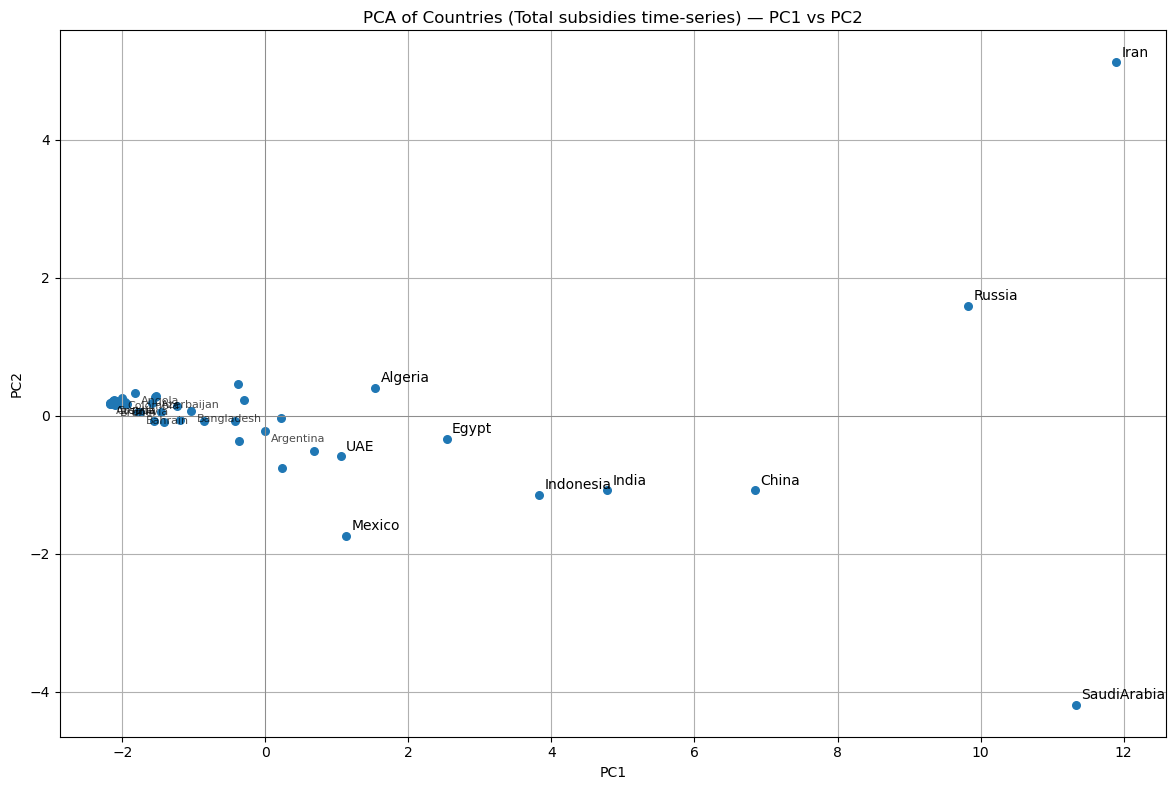


PCA loadings (years -> PCs):



,PC1,PC2,PC3
2010,0.279272,-0.179651,-0.116756
2011,0.266625,-0.343968,-0.104938
2012,0.274888,-0.202260,-0.262622
2013,0.274747,-0.185462,-0.268211
2014,0.274065,-0.177925,-0.221711
2015,0.277316,-0.171094,0.123170
2016,0.264513,-0.215108,0.355958
2017,0.275748,-0.187226,0.094428
2018,0.281423,0.140973,0.077412
2019,0.235311,0.453184,-0.387009



Saved country_pca_scores.csv (PC1..PC3 for each country).


In [114]:

# STEP 21 — PCA on country-level total subsidy time-series (2010-2023)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 1) Prepare country x year matrix: sum across products for each country per year
year_cols = [col for col in country_df.columns if str(col).isdigit()]
country_time = country_df.groupby("Country")[year_cols].sum()

# Drop countries that are all-NaN or zero
country_time = country_time.dropna(how='all')
country_time = country_time[(country_time.sum(axis=1) != 0)]

print("Shape of country x year matrix:", country_time.shape)

# 2) Standardize (mean=0, std=1) before PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(country_time.values)

# 3) Run PCA (3 components)
pca = PCA(n_components=3, random_state=0)
pcs = pca.fit_transform(X_scaled)

print("\nExplained variance ratio (PC1..PC3):")
for i, ratio in enumerate(pca.explained_variance_ratio_, start=1):
    print(f"PC{i}: {ratio:.4f}")

print(f"\nTotal explained by first 3 PCs: {pca.explained_variance_ratio_.sum():.4f}")

# 4) Create a DataFrame for PCs with country names
import pandas as pd
pc_df = pd.DataFrame(pcs[:, :3], index=country_time.index, columns=["PC1", "PC2", "PC3"])

# 5) Scatter plot PC1 vs PC2 and label notable countries (top total subsidy)
total_by_country = country_time.sum(axis=1).sort_values(ascending=False)
top_countries = total_by_country.head(10).index.tolist()  # top 10 by total across years

plt.figure(figsize=(12,8))
plt.scatter(pc_df["PC1"], pc_df["PC2"], s=30)
plt.axhline(0, color='grey', linewidth=0.5)
plt.axvline(0, color='grey', linewidth=0.5)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA of Countries (Total subsidies time-series) — PC1 vs PC2")

# Annotate top countries and some other interesting points
for country in top_countries:
    if country in pc_df.index:
        x, y = pc_df.loc[country, ["PC1","PC2"]]
        plt.annotate(country, (x, y), textcoords="offset points", xytext=(4,4))

# Optionally annotate a few more random points for context (up to 10)
others = [c for c in pc_df.index if c not in top_countries][:10]
for country in others:
    x, y = pc_df.loc[country, ["PC1","PC2"]]
    plt.annotate(country, (x, y), textcoords="offset points", xytext=(4,-8), fontsize=8, alpha=0.7)

plt.grid(True)
plt.tight_layout()
plt.show()

# 6) Inspect PCA loadings (which years drive PCs)
loadings = pd.DataFrame(pca.components_.T, index=year_cols, columns=["PC1","PC2","PC3"])
print("\nPCA loadings (years -> PCs):\n")
display(loadings)

# 7) Save PC scores for further analysis
pc_df.to_csv("country_pca_scores.csv")
print("\nSaved country_pca_scores.csv (PC1..PC3 for each country).")


In [ ]:
#  — K-Means Clustering of Countries (using the PCA data)

C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

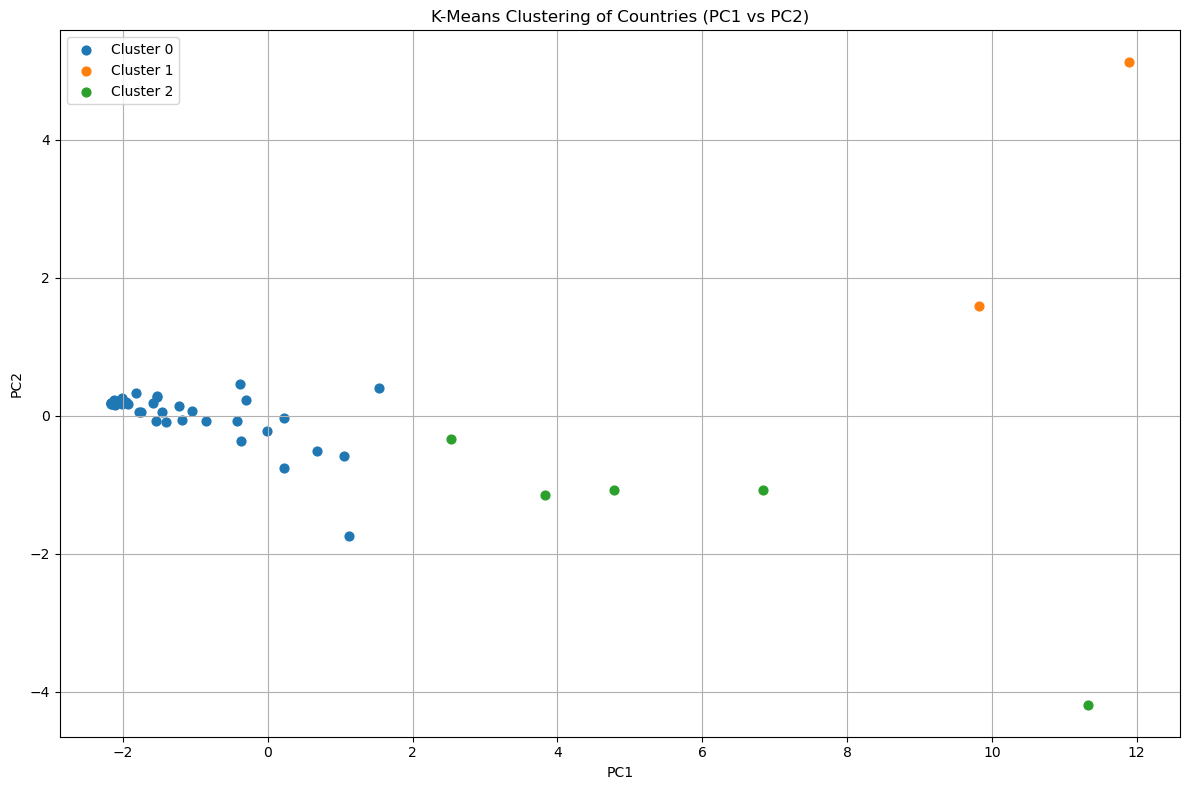


=== Countries per Cluster ===

Cluster 0:
['Algeria', 'Angola', 'Argentina', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bolivia', 'Brunei', 'Colombia', 'Croatia', 'Ecuador', 'ElSalvador', 'France', 'Gabon', 'Ghana', 'Hungary', 'Iraq', 'Kazakhstan', 'Kuwait'] ...

Cluster 1:
['Iran', 'Russia'] ...

Cluster 2:
['China', 'Egypt', 'India', 'Indonesia', 'SaudiArabia'] ...

Saved: country_clusters.csv (PC1, PC2, PC3, Cluster)


In [115]:
#  — K-Means Clustering of Countries (using the PCA data)

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Use the PC scores we calculated earlier (pc_df)
# pc_df has columns: PC1, PC2, PC3 with country names as index

# ===== Step 1: choose number of clusters =====
k = 3   # you can change to 4 or 5 later

# ===== Step 2: Fit KMeans on PC1, PC2, PC3 =====
kmeans = KMeans(n_clusters=k, random_state=0)
pc_df["Cluster"] = kmeans.fit_predict(pc_df[["PC1", "PC2", "PC3"]])

# ===== Step 3: Plot the clusters on PC1 vs PC2 =====
plt.figure(figsize=(12,8))

for cluster_id in range(k):
    subset = pc_df[pc_df["Cluster"] == cluster_id]
    plt.scatter(subset["PC1"], subset["PC2"], label=f"Cluster {cluster_id}", s=40)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("K-Means Clustering of Countries (PC1 vs PC2)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ===== Step 4: Print sample countries per cluster =====
print("\n=== Countries per Cluster ===")
for cluster_id in range(k):
    print(f"\nCluster {cluster_id}:")
    print(pc_df[pc_df["Cluster"] == cluster_id].index.tolist()[:20], "...")

# ===== Step 5: Export cluster results =====
pc_df.to_csv("country_clusters.csv")
print("\nSaved: country_clusters.csv (PC1, PC2, PC3, Cluster)")



In [116]:
#Regional Analysis (Asia vs Europe vs Africa vs Americas vs Middle East)

In [117]:
 region_map = {
    # ASIA
    "China": "Asia", "India": "Asia", "Indonesia": "Asia", "Japan": "Asia",
    "South Korea": "Asia", "Bangladesh": "Asia", "Pakistan": "Asia",
    "Malaysia": "Asia", "Thailand": "Asia", "Vietnam": "Asia",

    # EUROPE
    "Germany": "Europe", "France": "Europe", "Italy": "Europe", "Spain": "Europe",
    "United Kingdom": "Europe", "Poland": "Europe", "Netherlands": "Europe",
    "Sweden": "Europe", "Norway": "Europe", "Finland": "Europe",

    # AFRICA
    "Algeria": "Africa", "Angola": "Africa", "Nigeria": "Africa",
    "Egypt": "Africa", "South Africa": "Africa", "Morocco": "Africa",

    # MIDDLE EAST
    "Saudi Arabia": "Middle East", "Iran": "Middle East",
    "Iraq": "Middle East", "UAE": "Middle East", "Qatar": "Middle East",

    # NORTH AMERICA
    "United States": "North America", "Canada": "North America",

    # SOUTH AMERICA
    "Argentina": "South America", "Brazil": "South America", "Chile": "South America",

    # OCEANIA
    "Australia": "Oceania", "New Zealand": "Oceania"
}

# Apply region mapping
country_df["Region"] = country_df["Country"].map(region_map)

# Check how many countries got mapped
country_df["Region"].value_counts(dropna=False)


Region
NaN              140
Asia              40
Africa            20
Middle East       20
Europe            15
South America      5
Name: count, dtype: int64

In [118]:
#Compute Total Subsidy Per Region (2010–2023)

In [119]:
# Identify year columns
year_cols = [col for col in country_df.columns if str(col).isdigit()]

# Sum all subsidies per region (across all years)
region_totals = country_df.groupby("Region")[year_cols].sum()

region_totals


,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Region,,,,,,,,,,,,,,
Africa,71753.6,91848.0,95378.9,99924.4,85544.5,55816.0,39784.9,76284.2,111817.8,73124.2,42672.0,116164.9,253556.5,132932.6
Asia,232432.6,310752.4,350462.7,278976.3,247565.6,161762.4,197948.4,203035.6,268169.2,169424.6,95196.9,240620.9,584970.4,308466.0
Europe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37167.2,0.0
Middle East,180886.4,158281.6,220366.7,209241.3,181211.4,120779.9,79395.2,109303.9,207720.2,336940.0,213008.6,284165.0,444994.1,230795.7
South America,21784.0,27618.6,24131.6,29487.4,29138.0,19589.6,10860.2,8307.6,13619.9,11380.6,7475.2,35133.7,42352.0,18136.0


In [120]:
#Plot Regional Trend (Line Chart)


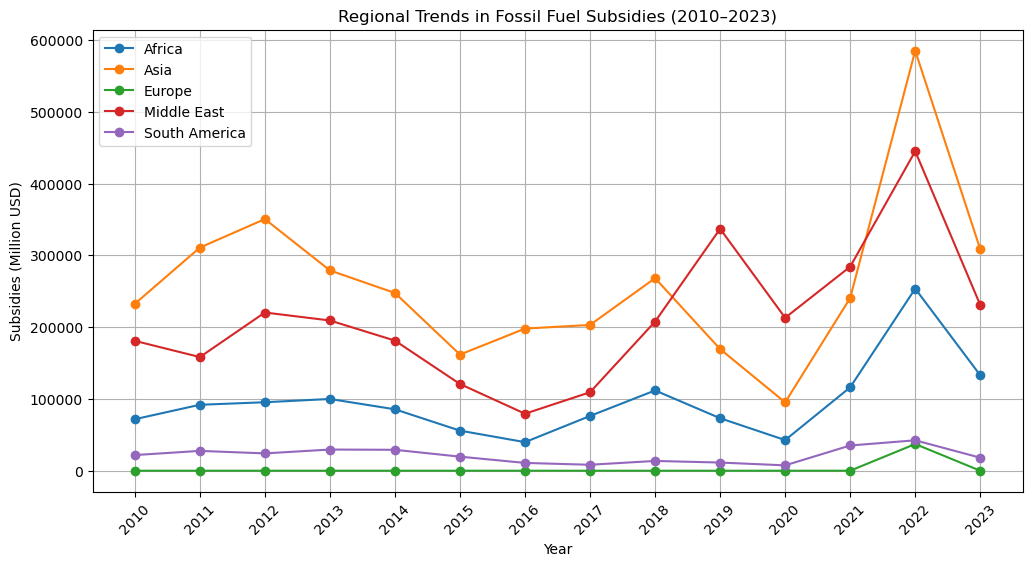

In [121]:
plt.figure(figsize=(12,6))

for region in region_totals.index:
    plt.plot(year_cols, region_totals.loc[region].values, marker='o', label=region)

plt.title("Regional Trends in Fossil Fuel Subsidies (2010–2023)")
plt.xlabel("Year")
plt.ylabel("Subsidies (Million USD)")
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.show()


In [122]:
#Developed vs Developing Countries Comparison

In [123]:
 
developed_list = [
    "United States", "Canada", "Australia", "New Zealand",
    "Japan", "South Korea", "Singapore", 
    "Germany", "France", "United Kingdom", "Italy", "Spain",
    "Netherlands", "Sweden", "Norway", "Finland",
]

# If a country is in developed_list → Developed
# Otherwise → Developing

country_df["Status"] = country_df["Country"].apply(
    lambda x: "Developed" if x in developed_list else "Developing"
)

country_df["Status"].value_counts(dropna=False)


Status
Developing    230
Developed      10
Name: count, dtype: int64

In [124]:
#Total Subsidies by Development Status (2010–2023)

In [125]:
# Identify year columns
year_cols = [col for col in country_df.columns if str(col).isdigit()]

# Sum subsidies for each group
status_totals = country_df.groupby("Status")[year_cols].sum()

status_totals


,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Status,,,,,,,,,,,,,,
Developed,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28830.3,0.0
Developing,931479.4,1077005.4,1192630.1,1094791.7,979108.0,751025.9,656468.2,734202.4,1024941.1,846291.8,525354.2,1176972.0,2327020.9,1232783.6


In [126]:
#Plot Trend (Developed vs Developing)


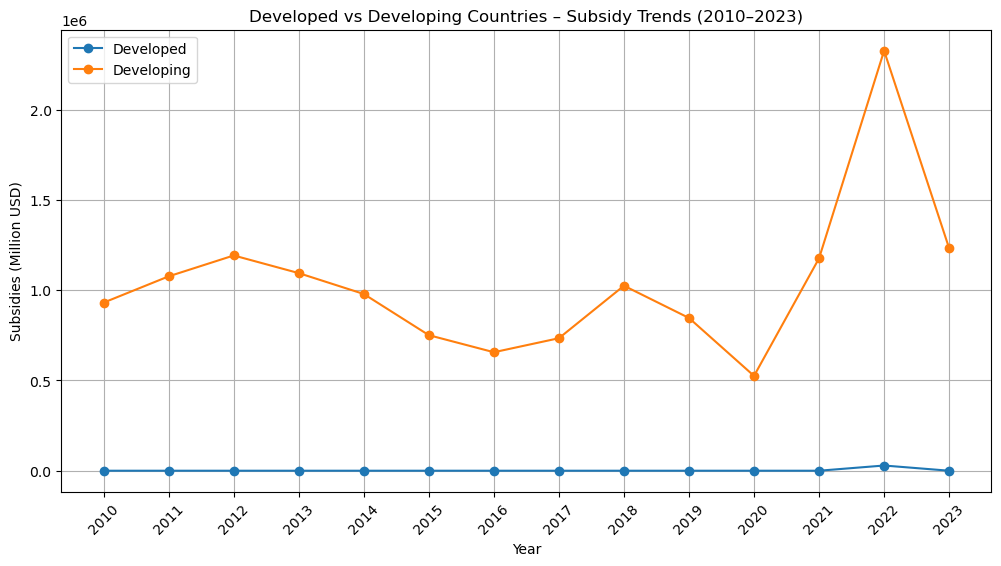

In [127]:
plt.figure(figsize=(12,6))

for status in status_totals.index:
    plt.plot(
        year_cols,
        status_totals.loc[status].values,
        marker='o',
        label=status
    )

plt.title("Developed vs Developing Countries – Subsidy Trends (2010–2023)")
plt.xlabel("Year")
plt.ylabel("Subsidies (Million USD)")
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [ ]:
 #[[[[[[[[[[[[[[[[+++++++++++++++++++++END++++++++++++++++++++++++++++++END+++++++++++++++++++++++++++++END+++++++++++++++++++++++++++END++++++++++++++++++END]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]